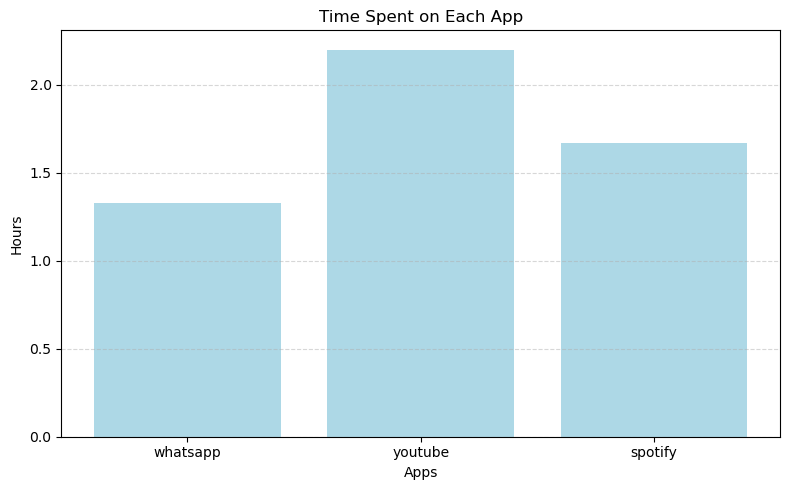

In [ ]:
#                                                           SOCIAL MEDIA USAGE TRACKER

import tkinter as tk
from tkinter import messagebox
import matplotlib.pyplot as plt
#create main window
window = tk.Tk()
window.title("Social Media Usage Tracker")
window.geometry("450x480")
window.config(bg="white") 
window.iconbitmap("icon.ico")
#create dictionary to store data usage
usage_data = {}

#function to add app usage
def add_data():
    app = app_entry.get()
    hrs = hours_entry.get()
    mins = minutes_entry.get()

    if app and(hrs or mins):
        try:
            hrs = float(hrs) if hrs else 0
            mins = float(mins) if mins else 0
            #convert mins to hours
            total_time = hrs + (mins / 60) 
            usage_data[app] = round(total_time, 2)

            messagebox.showinfo("Success",f"{app}: {round(total_time, 2)} hrs added.")
            app_entry.delete(0, tk.END)
            hours_entry.delete(0, tk.END)
            minutes_entry.delete(0, tk.END)
        except ValueError:
            messagebox.showerror("Error","Please enter numbers only.")
    else:
        messagebox.showerror("Error","Please fill all fields.")

#function to show bar chart
def show_bar_chart():
    if usage_data:
        apps = list(usage_data.keys())
        times = list(usage_data.values())

        plt.figure(figsize=(8, 5))
        plt.bar(apps, times, color="lightblue")
        plt.title("Time Spent on Each App")
        plt.xlabel("Apps")
        plt.ylabel("Hours")
        plt.grid(axis="y", linestyle="--", alpha=0.5)
        plt.tight_layout()
        plt.show()
    else:
        messagebox.showerror("Error", "No data to show.")

#entry box style function
def styled_entry(parent, width=15):
    entry = tk.Entry(parent, font=("Segoe UI", 11), bg="white", fg="black", bd=1, relief="solid", width=width)
    entry.pack(pady=5, ipadx=5, ipady=4)
    return entry

#button style function
def styled_button(text,command):
    return tk.Button(window, text=text, command=command,
                     font=("Segoe UI", 11), bg="lightblue", fg="white",
                     activebackground="skyblue", relief="flat",
                     padx=10, pady=5, cursor="hand2")

#heading
tk.Label(window, text="Social Media Usage Tracker", font=("Segoe UI", 16, "bold"),
         bg="white", fg="black").pack(pady=15)

#app name entry
tk.Label(window, text="App Name:", font=("Segoe UI",11), bg="white", fg="black").pack()
app_entry = styled_entry(window)

#time entry labels
tk.Label(window,text="Time Spent:", font=("Segoe UI",11), bg="white", fg="black").pack()

#frame for hour and minute inputs
time_frame = tk.Frame(window, bg="white")
time_frame.pack()

tk.Label(time_frame, text="Hours", font=("Segoe UI", 10), bg="white").grid(row=0, column=0, padx=5)
tk.Label(time_frame, text="Minutes", font=("Segoe UI", 10), bg="white").grid(row=0, column=1, padx=5)

#hour and minute input boxes
hours_entry = tk.Entry(time_frame, font=("Segoe UI",11), width=8, bg="white", fg="black", bd=1, relief="solid")
hours_entry.grid(row=1, column=0, padx=5, pady=5)

minutes_entry = tk.Entry(time_frame, font=("Segoe UI",11), width=8, bg="white", fg="black", bd=1, relief="solid")
minutes_entry.grid(row=1, column=1, padx=5, pady=5)

#buttons
styled_button("Add Usage",add_data).pack(pady=10)
styled_button("Show Bar Chart", show_bar_chart).pack(pady=5)

#run the app
window.mainloop()